In [1]:
import pandas as pd

data = {
    "OrderID": [1,2,3,4,5,6,7,8,9,10],
    "Region": ["East","West","North","South","East","West","North","South","East","West"],
    "Sales": [200,500,1000,300,None,700,12000,400,350,450],
    "Profit": [20,50,120,30,25,80,1500,40,35,45]
}

df = pd.DataFrame(data)
df.to_csv("sales_data.csv", index=False)

df


,OrderID,Region,Sales,Profit
0,1,East,200.0,20
1,2,West,500.0,50
2,3,North,1000.0,120
3,4,South,300.0,30
4,5,East,NaN,25
5,6,West,700.0,80
6,7,North,12000.0,1500
7,8,South,400.0,40
8,9,East,350.0,35
9,10,West,450.0,45


In [4]:
sns.set(style="whitegrid")


Original Dataset:


,OrderID,Region,Sales,Profit
0,1,East,200.0,20
1,2,West,500.0,50
2,3,North,1000.0,120
3,4,South,300.0,30
4,5,East,NaN,25
5,6,West,700.0,80
6,7,North,12000.0,1500
7,8,South,400.0,40
8,9,East,350.0,35
9,10,West,450.0,45



Missing Values:
OrderID    0
Region     0
Sales      1
Profit     0
dtype: int64

After Handling Missing Values:


/tmp/ipython-input-986660496.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].mean(), inplace=True)


,OrderID,Region,Sales,Profit
0,1,East,200.000000,20
1,2,West,500.000000,50
2,3,North,1000.000000,120
3,4,South,300.000000,30
4,5,East,1766.666667,25
5,6,West,700.000000,80
6,7,North,12000.000000,1500
7,8,South,400.000000,40
8,9,East,350.000000,35
9,10,West,450.000000,45



Lower Bound: -481.25
Upper Bound: 1768.75

Detected Outliers:


,OrderID,Region,Sales,Profit
6,7,North,12000.0,1500


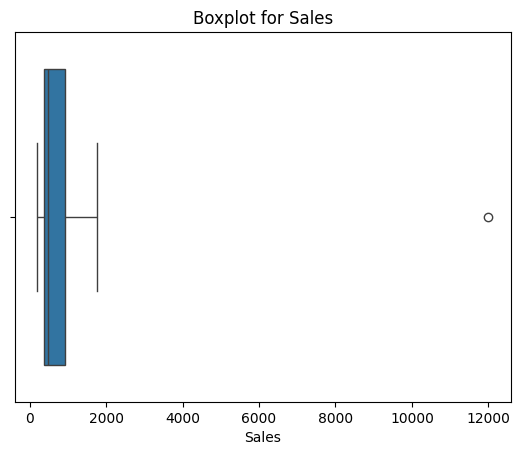

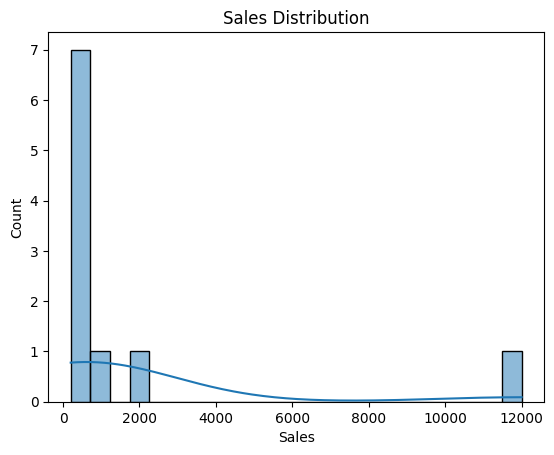


Cleaned Dataset:


,OrderID,Region,Sales,Profit
0,1,East,200.000000,20
1,2,West,500.000000,50
2,3,North,1000.000000,120
3,4,South,300.000000,30
4,5,East,1766.666667,25
5,6,West,700.000000,80
7,8,South,400.000000,40
8,9,East,350.000000,35
9,10,West,450.000000,45


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("sales_data.csv")

print("Original Dataset:")
display(df)

print("\nMissing Values:")
print(df.isnull().sum())

df['Sales'].fillna(df['Sales'].mean(), inplace=True)

print("\nAfter Handling Missing Values:")
display(df)

Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print("\nDetected Outliers:")
display(outliers)


plt.figure()
sns.boxplot(x=df['Sales'])
plt.title("Boxplot for Sales")
plt.show()

plt.figure()
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()


df_cleaned = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

print("\nCleaned Dataset:")
display(df_cleaned)

df_cleaned.to_csv("cleaned_sales_data.csv", index=False)


In [3]:
from google.colab import files
files.download("cleaned_sales_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>